1. Data Ingesiton

2. Eda of the data

3. processing of the data

4. model building

5. model evalution

# Data Ingestion

Import the Required Libraries: Import the required libraries such as pandas, numpy, matplotlib, seaborn, etc.

Load the Data.

Load the Time Series Data into a pandas dataframe.

Set the datetime column as the index of the dataframe.

Check the datatype of the index and convert it to datetime if necessary.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os 
import sys

In [2]:
data=pd.read_csv("TSLA.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
# univariate analysis
stock_data=data[["Date","Close"]]

In [5]:
stock_data

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002
...,...,...
753,2022-05-16,724.369995
754,2022-05-17,761.609985
755,2022-05-18,709.809998
756,2022-05-19,709.419983


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data["Date"]=pd.to_datetime(stock_data.Date)

C:\Users\prana\AppData\Local\Temp\ipykernel_20276\3739671253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["Date"]=pd.to_datetime(stock_data.Date)


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data=stock_data.set_index("Date")

In [10]:
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


# why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been design in such a way it required date column as a index(scipy statsmodel)

# Eda of the data

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data 

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [11]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


In [12]:
stock_data.head(5)

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


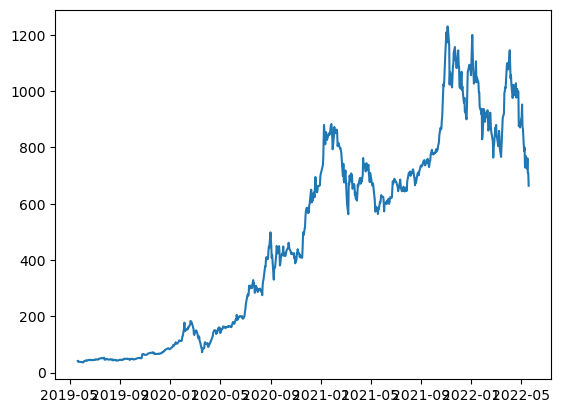

In [13]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

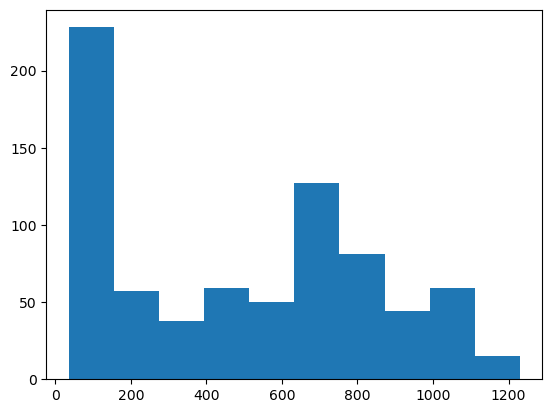

In [14]:
plt.hist(stock_data.Close)

C:\Users\prana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

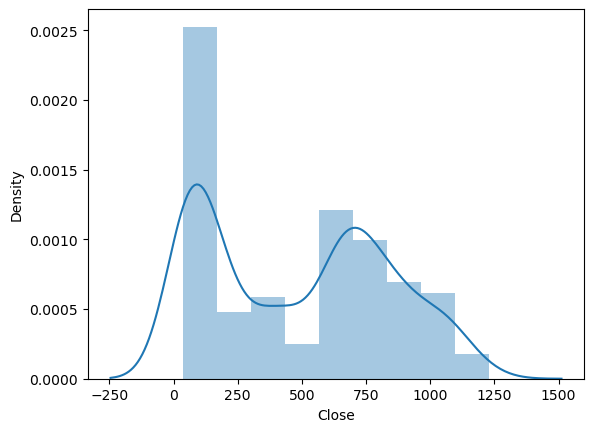

In [15]:
import seaborn as sns
sns.distplot(stock_data.Close)

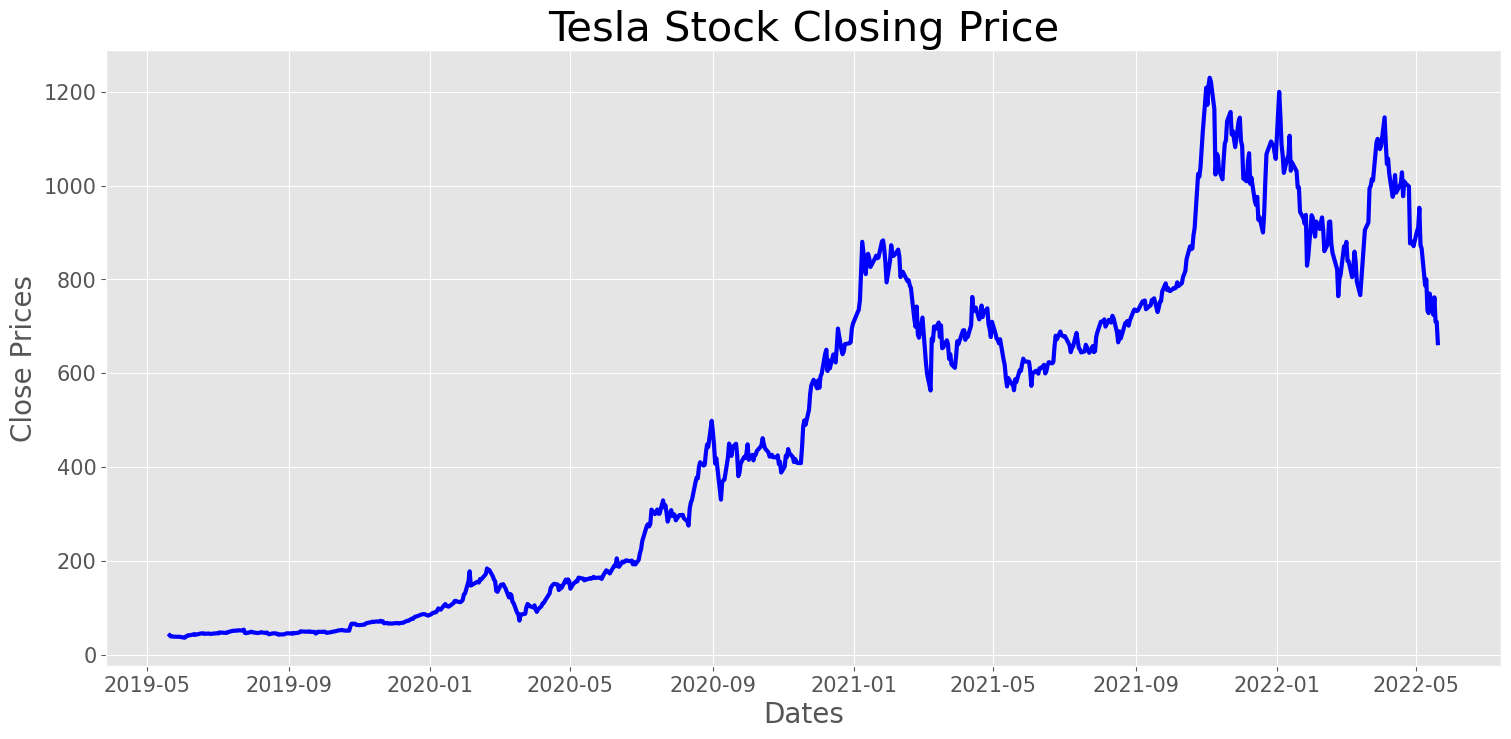

In [16]:
# Plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'],linewidth=3,color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

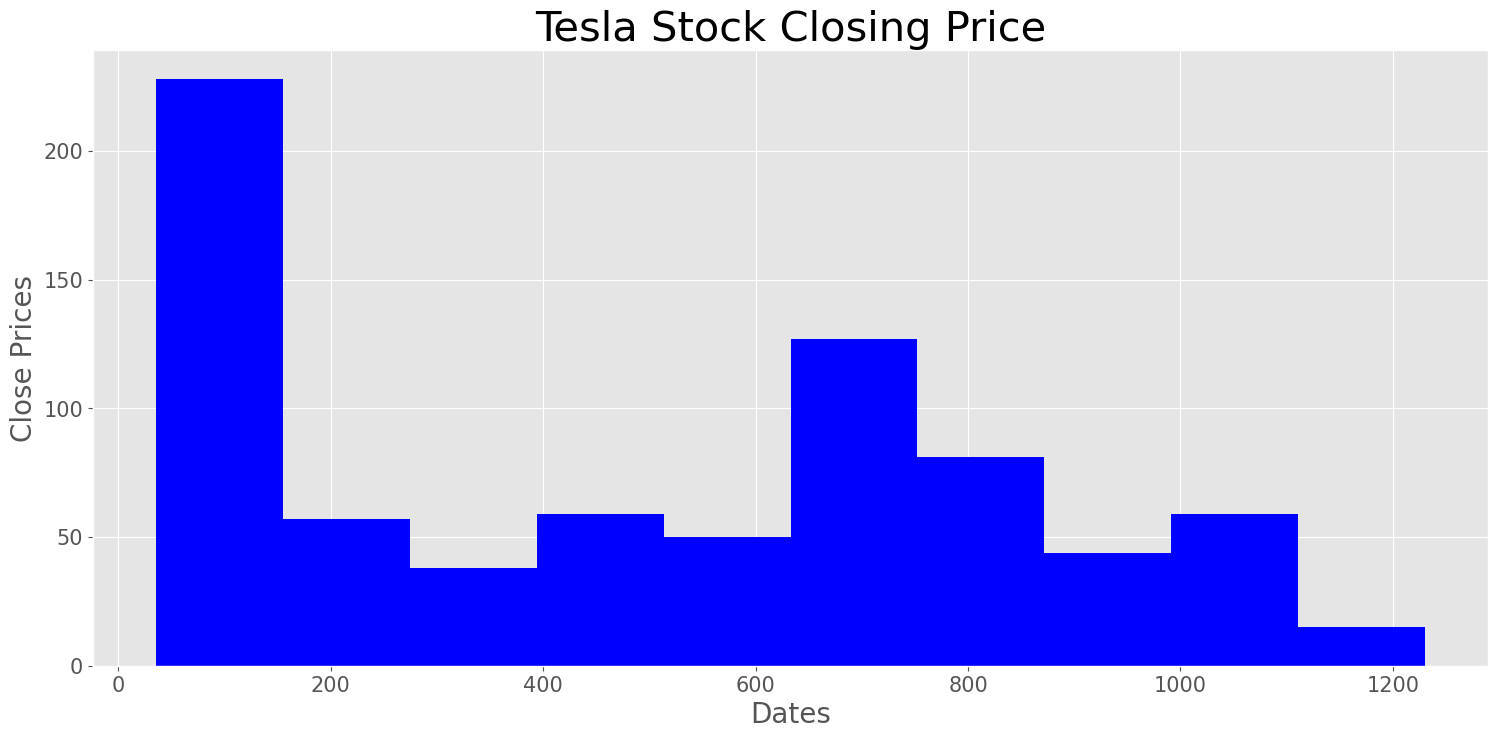

In [17]:
# Plotting close price
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'],linewidth=3,color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

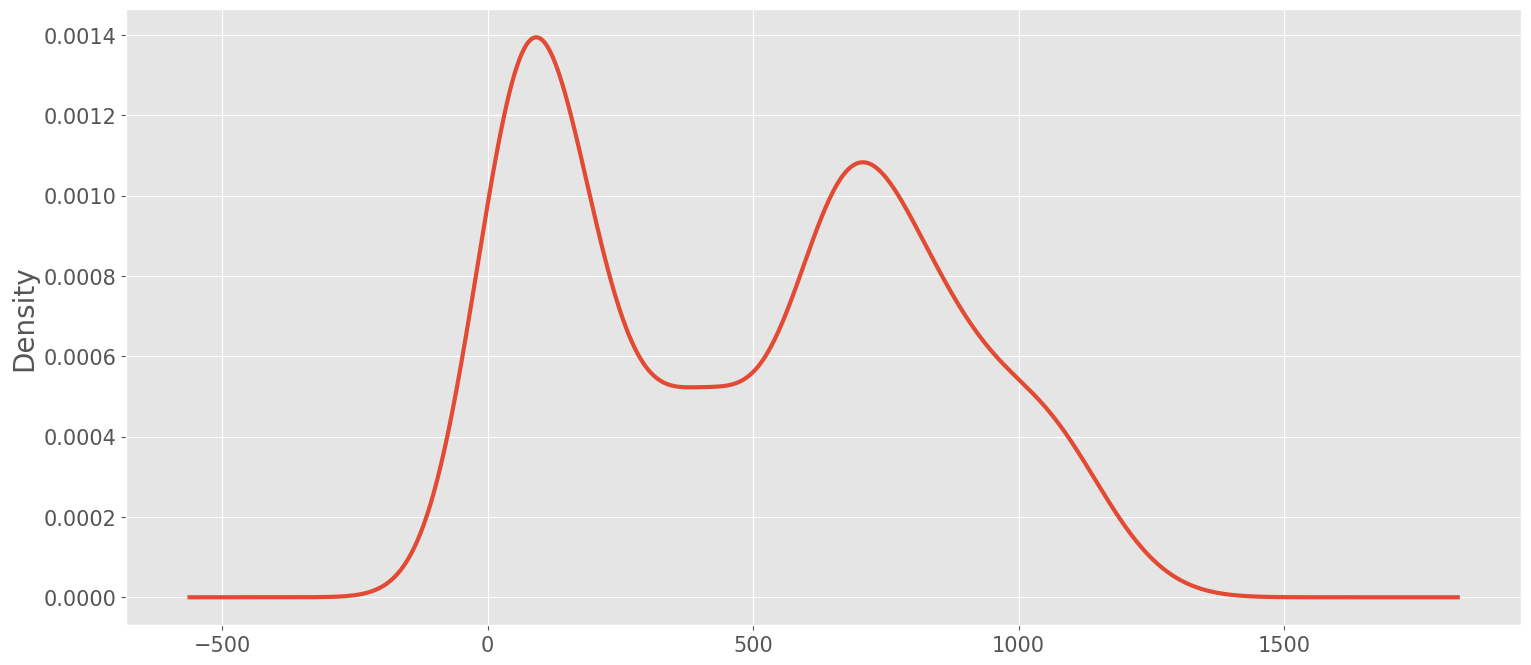

In [18]:
# Distribution of the close price
df_close=stock_data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid("both")
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

In [19]:
rolmean=stock_data["Close"].rolling(365).mean()

In [20]:
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    812.017943
2022-05-17    812.478847
2022-05-18    812.782327
2022-05-19    812.967697
2022-05-20    813.006108
Name: Close, Length: 758, dtype: float64

In [21]:
rolstd=stock_data["Close"].rolling(365).std()

In [22]:
rolstd

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    164.116764
2022-05-17    163.736844
2022-05-18    163.442547
2022-05-19    163.286341
2022-05-20    163.249516
Name: Close, Length: 758, dtype: float64

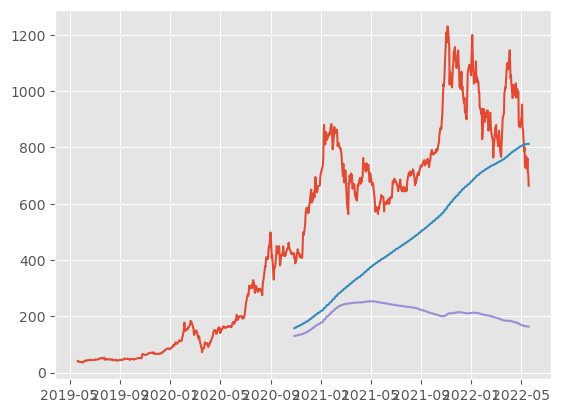

In [23]:
plt.plot(stock_data.Close)
plt.plot(rolmean)
plt.plot(rolstd)

In [24]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data.Close)

In [25]:
pd.Series(adft[0:4],index=["test stats","p value","lag value","data points"])

test stats      -1.363009
p value          0.599876
lag value        9.000000
data points    748.000000
dtype: float64

null hyphothesis = data i
p value=0.599876
p<0.05
reject null hyphothesis

p>0.05
accept null hyphothesis

In [26]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    

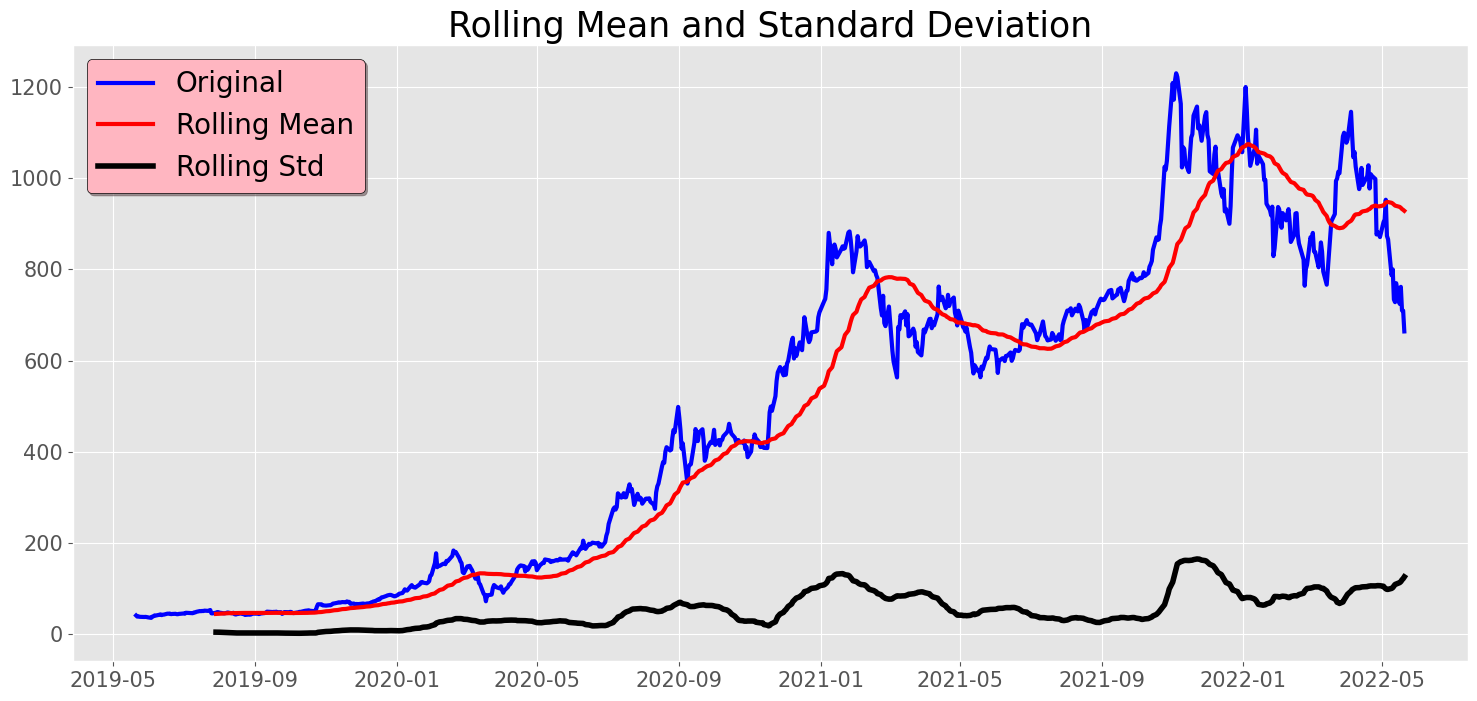

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [27]:
test_stationarity(stock_data.Close)

C:\Users\prana\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

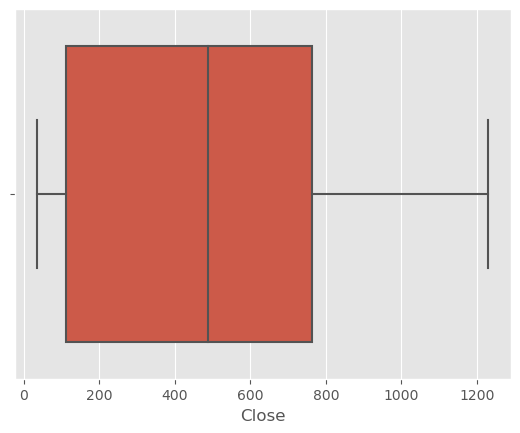

In [28]:
sns.boxplot(stock_data.Close)

In [29]:
# time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data[["Close"]],period=12)

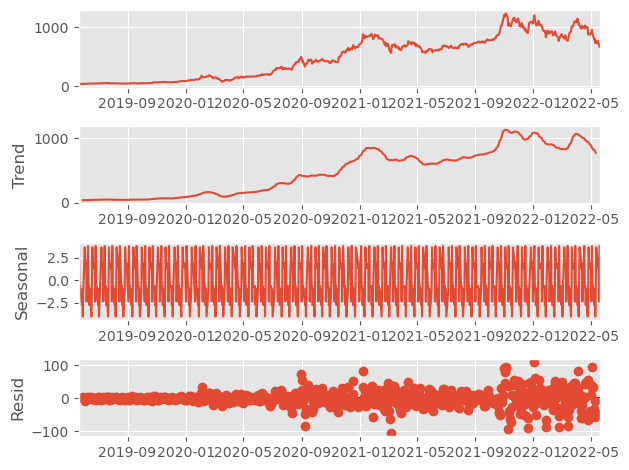

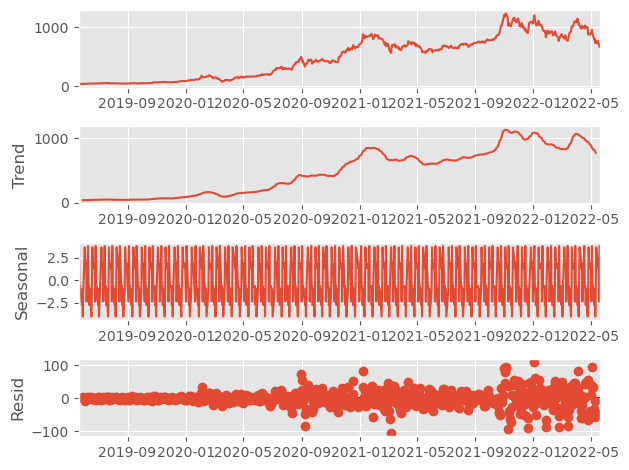

In [30]:
result.plot()

In [31]:
result.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


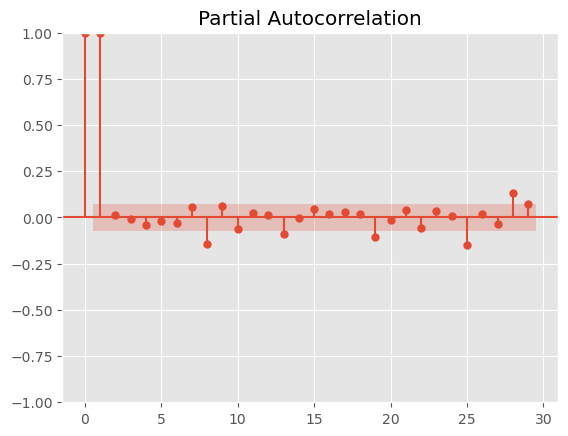

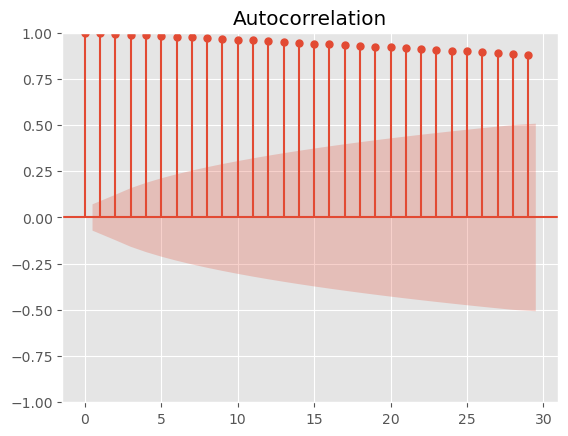

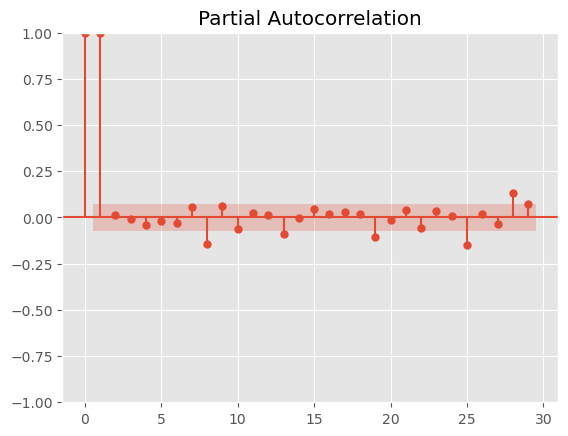

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

In [34]:
df_close=stock_data["Close"]

In [35]:
df_close

Date
2019-05-21     41.015999
2019-05-22     38.546001
2019-05-23     39.098000
2019-05-24     38.125999
2019-05-28     37.740002
                 ...    
2022-05-16    724.369995
2022-05-17    761.609985
2022-05-18    709.809998
2022-05-19    709.419983
2022-05-20    663.900024
Name: Close, Length: 758, dtype: float64

In [36]:
df_close=df_close.diff(1)

In [37]:
df_close=df_close.dropna()

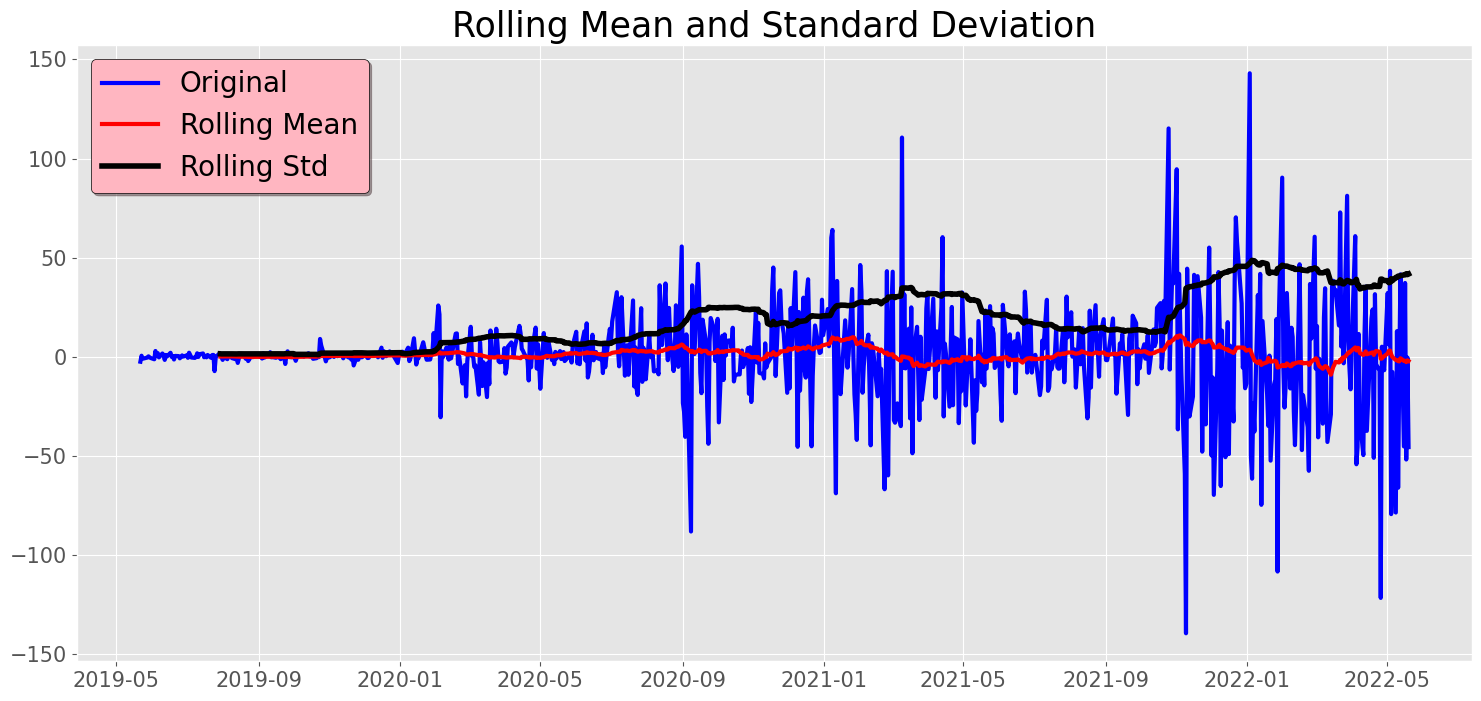

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [38]:
test_stationarity(df_close)

In [39]:
df_close[0:-60]

Date
2019-05-22    -2.469997
2019-05-23     0.551998
2019-05-24    -0.972000
2019-05-28    -0.385998
2019-05-29     0.231998
                ...    
2022-02-17   -47.040039
2022-02-18   -19.369995
2022-02-22   -35.449951
2022-02-23   -57.490051
2022-02-24    36.730042
Name: Close, Length: 697, dtype: float64

In [40]:
df_close[-60:]

Date
2022-02-25      9.099976
2022-02-28     60.559998
2022-03-01     -6.059998
2022-03-02     15.520020
2022-03-03    -40.600037
2022-03-04     -1.000000
2022-03-07    -33.709961
2022-03-08     19.820007
2022-03-09     34.569946
2022-03-10    -20.669983
2022-03-11    -42.950012
2022-03-14    -28.979980
2022-03-15     35.520020
2022-03-16     38.339966
2022-03-17     31.369995
2022-03-18     33.790039
2022-03-21     15.769958
2022-03-22     72.820007
2022-03-23      5.130005
2022-03-24     14.809998
2022-03-25     -3.279968
2022-03-28     81.199951
2022-03-29      7.729980
2022-03-30     -5.579956
2022-03-31    -16.390015
2022-04-01      6.989990
2022-04-04     60.859985
2022-04-05    -54.189941
2022-04-06    -45.500000
2022-04-07     11.500000
2022-04-08    -31.770020
2022-04-11    -49.559998
2022-04-12     11.020020
2022-04-13     35.419983
2022-04-14    -37.369995
2022-04-18     19.289978
2022-04-19     23.860046
2022-04-20    -50.950012
2022-04-21     31.580017
2022-04-22     -3.73

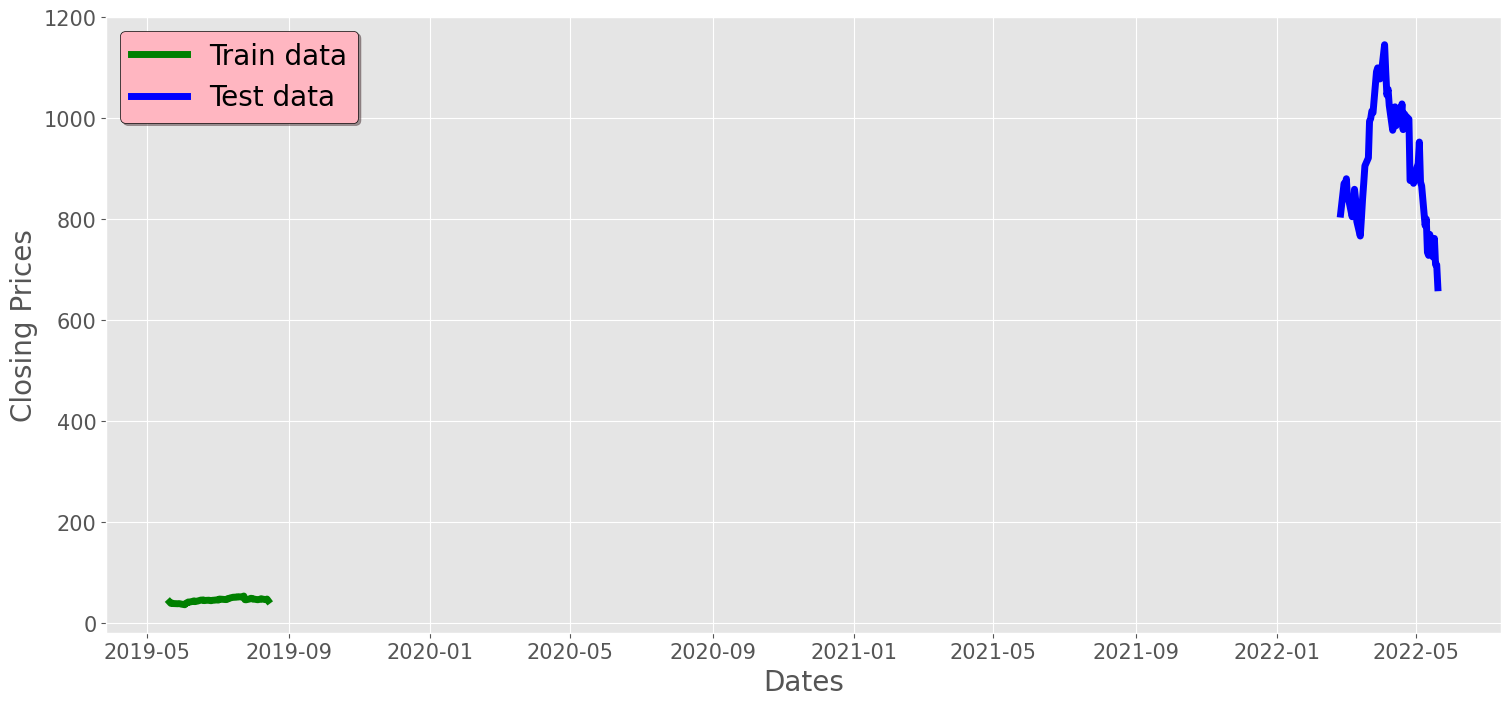

In [41]:
# split data into train and test
train_data=stock_data["Close"][0:60]
test_data=stock_data["Close"][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.ylabel('Closing Prices',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train data',linewidth=5)
plt.plot(test_data,'blue',label='Test data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')

In [42]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [43]:
history=[x for x in train_data]

In [45]:
model=ARIMA(history,order=(1,1,1))

In [46]:
model=model.fit()

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -105.771
Date:                Thu, 11 May 2023   AIC                            217.541
Time:                        16:25:45   BIC                            223.774
Sample:                             0   HQIC                           219.974
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2977      1.053      0.283      0.777      -1.765       2.361
ma.L1         -0.4400      0.965     -0.456      0.648      -2.332       1.452
sigma2         2.1109      0.233      9.055      0.000       1.654       2.568
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               188.35
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               2.16   Skew:                            -1.96
Prob(H) (two-sided):                  0.09   Kurtosis:                        10.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
model.forecast()

array([44.32136517])

In [51]:
mean_squared_error([test_data[0]],model.forecast())

586064.704806842

In [52]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

765.5486299425021

In [53]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i,j,k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [60]:
def train_arima_model(X,y,arima_order):
    history = [x for x in x]
    predictions = list()
    for t in range(len(y)):
        model=ARIMA(history,order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    rmse = np.sqrt(mean_squared_error(y,predictions))
    return rmse

In [61]:
def evaluate_models(dataset,test,p_values,d_values,q_values):
    dataset=dataset.astype('float32')
    best_score,best_cfg = float("inf"),None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order=(p,d,q)
                try:
                    rmse=train_arima_model(dataset,test,order)
                    if rmse<best_score:
                        best_score,best_cfg=rmse,order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg,best_score))

In [62]:
import warnings
warnings.filterwarnings('ignore')
p_values=range(0,3)
d_values=range(0,3)
q_values=range(0,3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

Best ARIMANone RMSE=inf


In [69]:
history=[x for x in train_data]
predictions=list()
for i in range(len(test_data)):
    model=ARIMA(history,order=(2,0,0))
    model=model.fit()
    fc=model.forecast(alpha=0.05)
    predictions.append(fc)
    history.append(test_data[i])
print(f"my RMSE {np.sqrt(mean_squared_error(test_data,predictions))}")

my RMSE 154.4526608024778


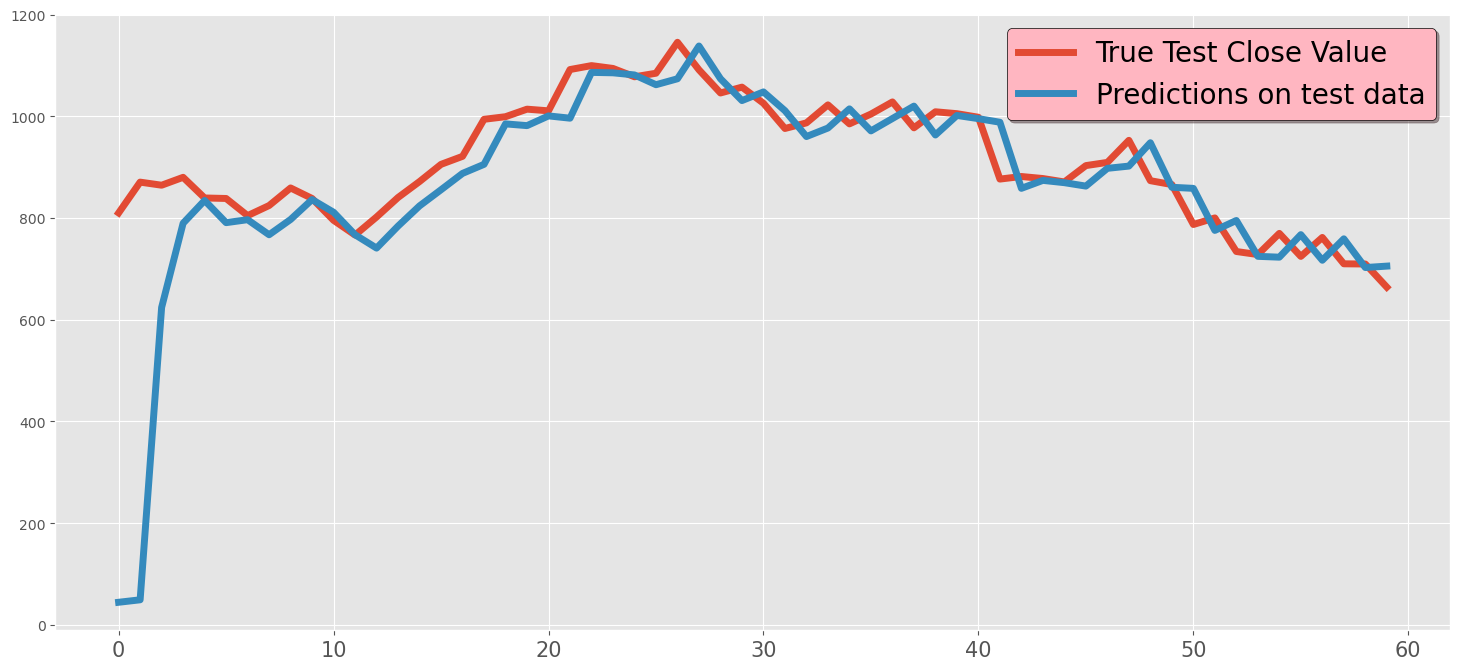

In [70]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data, label = 'True Test Close Value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'Predictions on test data', linewidth = 5)
plt.xticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
plt.show()

In [71]:
fc_series = pd.Series(predictions, index=test_data.index)

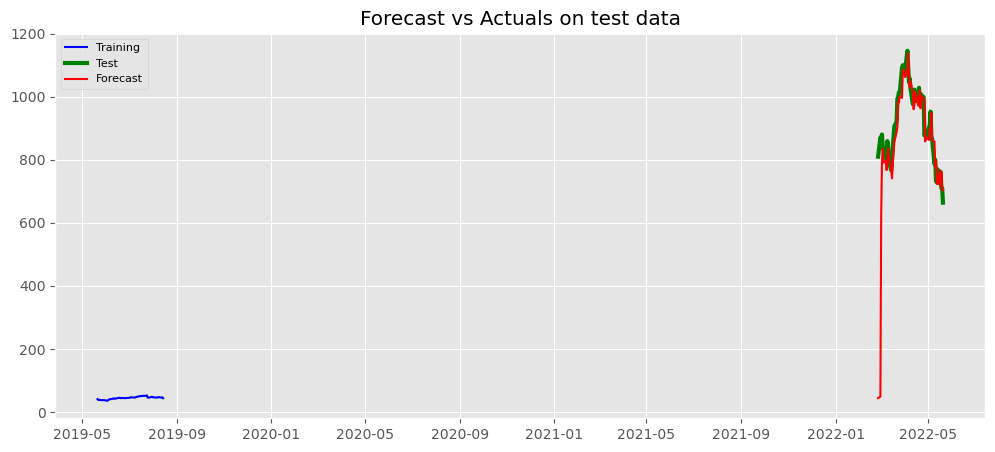

In [72]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='Training', color = 'blue')
plt.plot(test_data, label='Test', color = 'green', linewidth = 3)
plt.plot(fc_series, label='Forecast', color = 'red')
plt.title('Forecast vs Actuals on test data')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'model_fit' is not defined

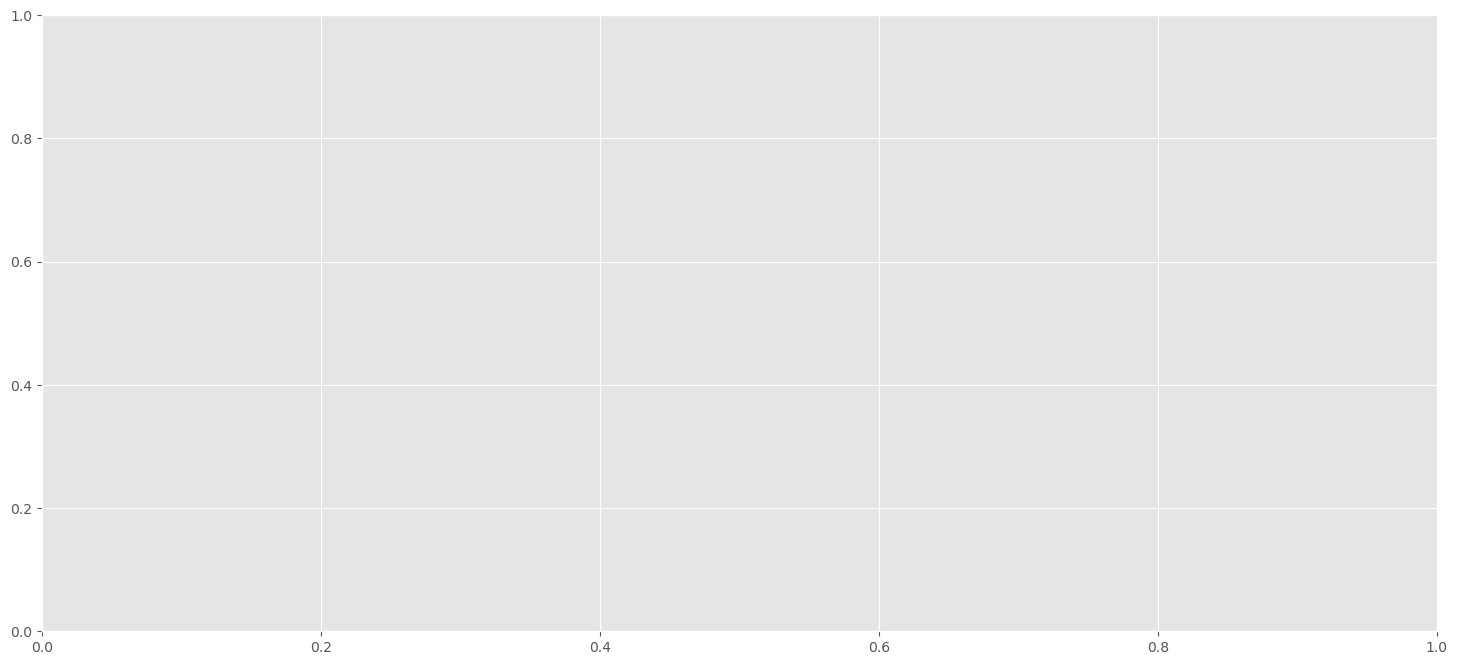

In [73]:
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(18,8))
ax1 = fig.add_subplot(111)
plot_predict(result=model_fit,start=1, end=len(df_close)+60, ax = ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% confidence interval'],fontsize = 20, shadow=True,facecolor='lightblue',edgecolor = 'k')
plt.show()

In [74]:
# evaluate parameters
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 152.98947090513394


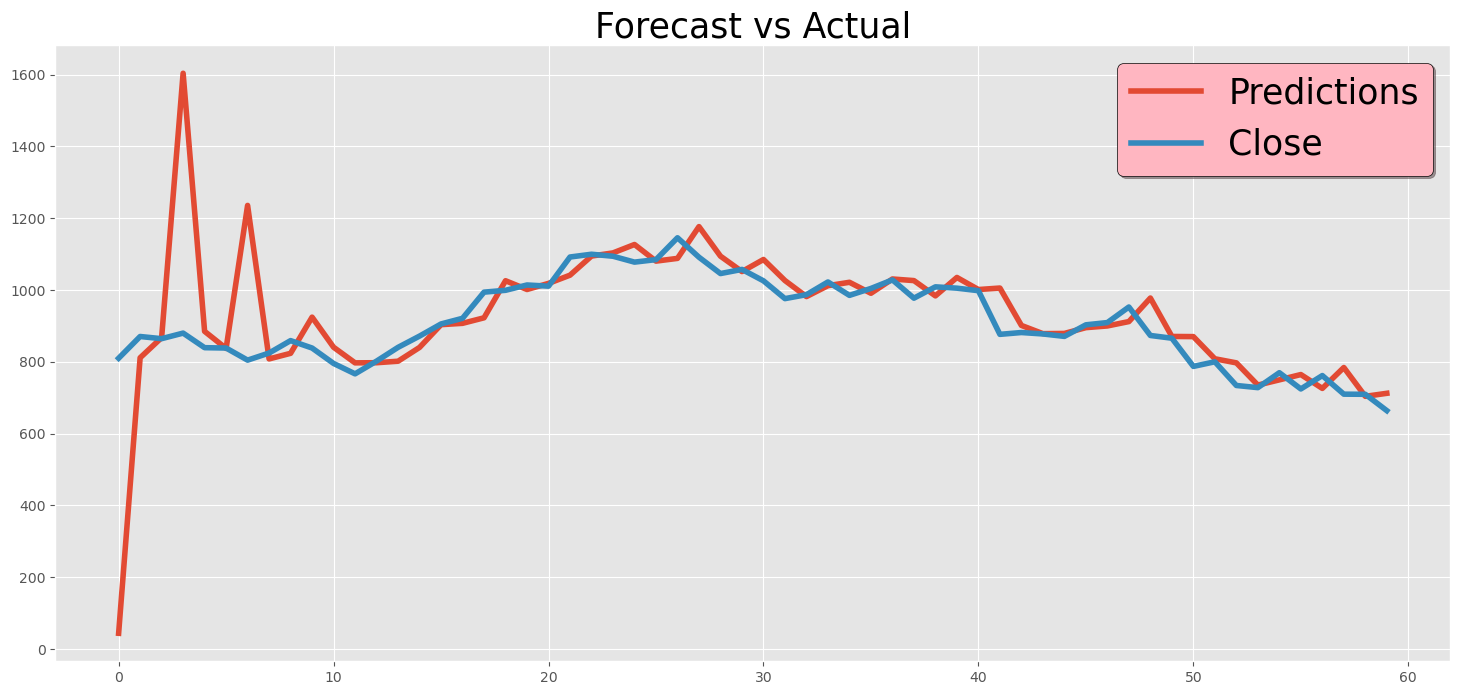

In [75]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')